## Assignment 3

Solve the breast cancer classification problem using the breast_cancer.csv dataset. Your problem is to predict and diagnose breast cancer using the features found in the data set. Try using all classifiers we learnt about to obtain an accuracy of 95% or higher on the test set. The test set is to be 30% of the dataset.

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("breast_cancer.csv",encoding='utf-8')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print(df["diagnosis"].value_counts(ascending=True),'\n\n')

M    212
B    357
Name: diagnosis, dtype: int64 




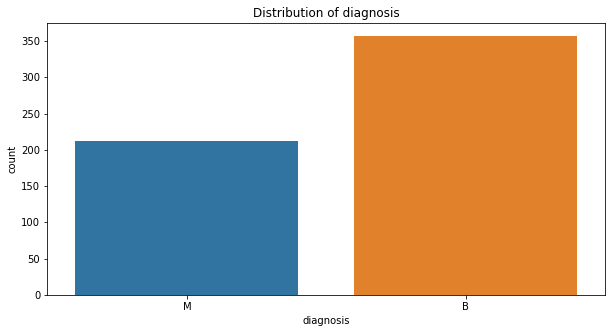

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x = df['diagnosis'])
plt.title('Distribution of diagnosis')
plt.show()

In [9]:
y = df.iloc[:, 0].values
X = df.iloc[:,1:].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

# MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

## KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print(accuracy_score(y_pred,y_test))

0.9590643274853801


## Logistic Regression

In [13]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train_norm, y_train)
y_pred = lr.predict(X_test_norm)
print(accuracy_score(y_test,y_pred))

0.9532163742690059


## support vector regression

In [14]:
svc1=SVC(kernel='rbf',C=5)
svc1.fit(X_train_norm, y_train)
y_pred = svc1.predict(X_test_norm)
print(accuracy_score(y_pred,y_test))

0.9707602339181286


## Decision Tree Classifier

In [15]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_norm, y_train)
y_pred = dt.predict(X_test_norm)
print(accuracy_score(y_pred,y_test))

0.9298245614035088


## RandomForest Classifier

In [16]:
rf=RandomForestClassifier(n_estimators=8,max_depth=6)
rf.fit(X_train_norm, y_train)
y_pred = rf.predict(X_test_norm)
print(accuracy_score(y_pred,y_test))

0.9473684210526315


# StandardScaler

In [17]:
y = df.iloc[:, 0].values
X = df.iloc[:,1:].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [18]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9824561403508771


## Logistic Regression

In [20]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print(accuracy_score(y_test,y_pred))

0.9824561403508771


## support vector regression

In [22]:
svc1=SVC(kernel='rbf',C=5)
svc1.fit(X_train_std, y_train)
y_pred = svc1.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9883040935672515


## Decision Tree Classifier

In [23]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_std, y_train)
y_pred = dt.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9298245614035088


## RandomForest Classifier

In [24]:
rf=RandomForestClassifier(n_estimators=8,max_depth=6)
rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9473684210526315
